<font size = 6>Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os

#sys.path.append("C:\\Program Files\\Lumerical\\v202\\api\\python\\") #Default windows lumapi path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi

#sys.path.append(os.path.dirname('C:\\Users\\andre\\Documents\\GitHub\\Photonics\\Ring Resonator')) #Current directory
sys.path.append(os.path.dirname('/home/fotonica01/Documentos/GitHub/Photonics/Ring Resonator'))

<font size = 6>Open Lumerical

In [9]:
fdtd = lumapi.FDTD(filename = 'RingResonator.fsp')

<font size = 6>Initial Parameters

In [6]:
c0 = 299792458
lmbd = np.linspace(1.5e-6, 1.6e-6, 200)
radius = 3e-6
gap = 150e-9
width = 0.4e-6
height = 0.18e-6
lc = 0
L = 20e-6

<font size = 6>Assembly

In [77]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

fdtd.addobject('ring_resonator')
fdtd.set({
    'x'                         : -L/2,
    'y'                         : 0,
    'z'                         : 0,
    'Lc'                        : lc,
    'gap'                       : gap,
    'radius'                    : radius,
    'base width'                : width,
    'base height'               : height,
    'material'                  : 'Si (Silicon) - Palik',
    'x span'                    : L
})

fdtd.addfdtd()
fdtd.set({
    'x'                         : 0,
    'x span'                    : L+2e-6,
    'y'                         : 0,
    'y span'                    : 10e-6,
    'z'                         : 0,
    'z span'                    : 2e-6,
    'background material'       : 'SiO2 (Glass) - Palik',
    'mesh accuracy'             : 4,
    'z min bc'                  : 'Symmetric',
    'set simulation bandwidth'  : 1,
    'simulation wavelength min' : 1.5e-6,
    'simulation wavelength max' : 1.6e-6,
    'simulation time'           : 3e-12
})

fdtd.addport()
fdtd.set({
    'x'                         : -1.25*radius,
    'z'                         : 0,
    'y'                         : radius + gap + width,
    'y span'                    : 2e-6,
    'z span'                    : 2e-6,
    'direction'                 : 'Forward'
})

fdtd.addport()
fdtd.set({
  'x'                           : 1.25*radius,
  'z'                           : 0,
  'y'                           : radius + gap + width,
  'y span'                      : 2e-6,
  'z span'                      : 2e-6,
  'direction'                   :'Backward'
})

fdtd.addport()
fdtd.set({
  'x'                           : -1.25*radius,
  'z'                           : 0,
  'y'                           : -(radius + gap + width),
  'y span'                      : 2e-6,
  'z span'                      : 2e-6,
  'direction'                   : 'Forward'
})

fdtd.addport()
fdtd.set({
  'x'                           : 1.25*radius,
  'z'                           : 0,
  'y'                           : -(radius + gap + width),
  'y span'                      : 2e-6,
  'z span'                      : 2e-6,
  'direction'                   :'Backward'
})
fdtd.setnamed('FDTD::ports', {
  'monitor frequency points'    : 20
}) 
fdtd.setglobalsource('wavelength start', 1.5e-6)
fdtd.setglobalsource('wavelength stop', 1.6e-6)

1.0

<font size = 6>LC Sweep (Straight Waveguide)

In [78]:
fdtd.setnamed('ring resonator::outer_bottom',{'enabled' :  0,})
fdtd.setnamed('ring resonator::arc2',{'enabled' :  0,})
fdtd.setnamed('ring resonator::arc3',{'enabled' :  0,})

fdtd.addrect()
fdtd.set({
    'name'      : 'Arm 1',
    'x min'     : -radius - width/2 - lc/2,
    'x max'     : -radius + width/2 - lc/2,
    'y min'     : -radius,
    'y max'     : 0,
    'z'         : 0,
    'z span'    : height,
    'material'  : 'Si (Silicon) - Palik'
})

fdtd.addrect()
fdtd.set({
    'name'      : 'Arm 2',
    'x min'     : radius - width/2 + lc/2,
    'x max'     : radius + width/2 + lc/2,
    'y min'     : -radius,
    'y max'     : 0,
    'z'         : 0,
    'z span'    : height,
    'material'  : 'Si (Silicon) - Palik'
})

fdtd.setnamed('FDTD', {
    'x span'    : 15e-6,
    'y'         : radius/2,
    'y span'    : 2.5*radius
})

fdtd.setnamed('FDTD::ports::port 1', {
    'x'          : -2*radius
})

fdtd.setnamed('FDTD::ports::port 2', {
    'x'          : 2*radius
})

fdtd.setnamed('FDTD::ports::port 3', {
    'injection axis'    : 'y-axis',
    'x'                 : -radius - lc/2,
    'x span'            : 2e-6,
    'y'                 : -1e-6
})

fdtd.setnamed('FDTD::ports::port 4', {
    'injection axis'    : 'y-axis',
    'x'                 : radius + lc/2,
    'x span'            : 2e-6,
    'y'                 : -1e-6,
    'direction'        : 'Forward'
})

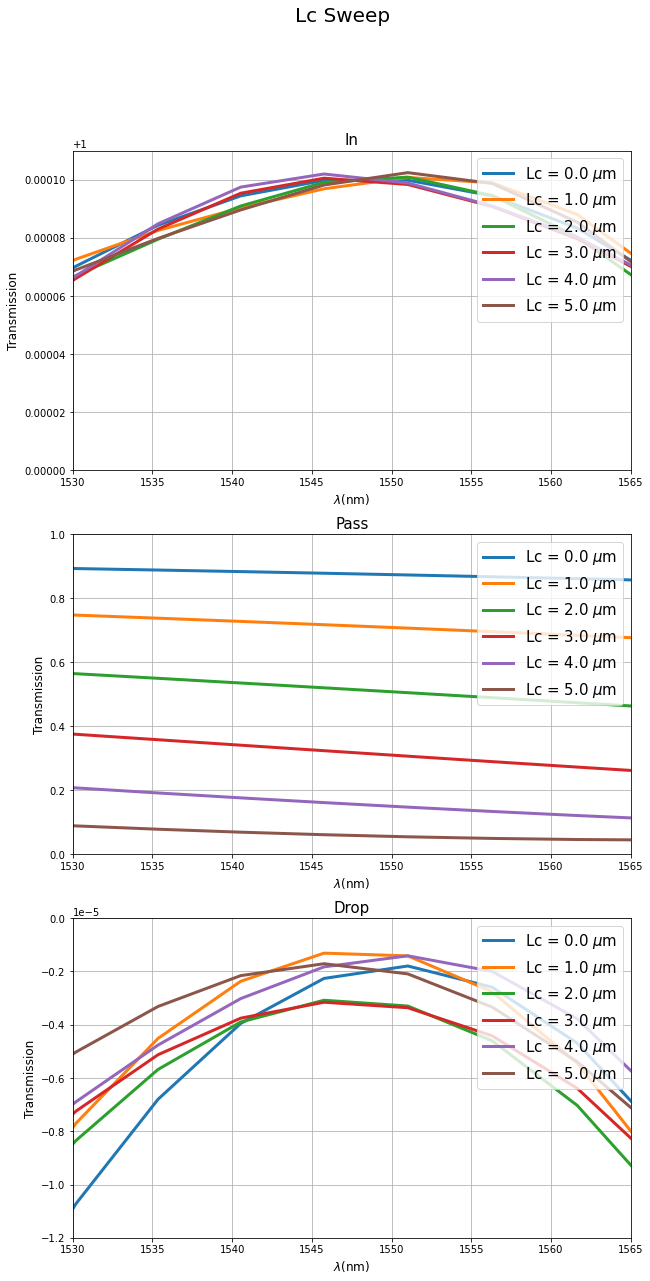

In [88]:
figure,ax0 = plt.subplots(3, 1, figsize=(10,20))

LC = np.linspace(0, 5, 6)
Pass = fdtd.getsweepresult('Lc sweep', 'Pass')
Drop = fdtd.getsweepresult('Lc sweep', 'Drop')
In = fdtd.getsweepresult('Lc sweep', 'In')
wavelenght = Pass['lambda']
Pass = np.transpose(Pass['T'])
Drop = np.transpose(Drop['T'])
In = np.transpose(In['T'])

for i in range(6):
    ax0[0].plot(wavelenght*1e9, In[i, :], label = 'Lc = ' + str(LC[i]) + r' $\mu$m', linewidth = 3)

ax0[0].set_xlim(1530, 1565)
ax0[0].set_ylim(1, 1.00011)
ax0[0].set_ylabel("Transmission", fontsize = '12')
ax0[0].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
ax0[0].set_title('In', size = 15)
ax0[0].legend(loc = 'upper right', prop = {'size': 15})
ax0[0].grid(True)

for i in range(6):
    ax0[1].plot(wavelenght*1e9, Pass[i, :], label = 'Lc = ' + str(LC[i]) + r' $\mu$m', linewidth = 3)

ax0[1].set_xlim(1530, 1565)
ax0[1].set_ylim(0, 1)
ax0[1].set_ylabel("Transmission", fontsize = '12')
ax0[1].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
ax0[1].set_title('Pass', size = 15)
ax0[1].legend(loc = 'upper right', prop = {'size': 15})
ax0[1].grid(True)

for i in range(6):
    ax0[2].plot(wavelenght*1e9, Drop[i, :], label = 'Lc = ' + str(LC[i]) + r' $\mu$m', linewidth = 3)

ax0[2].set_xlim(1530, 1565)
ax0[2].set_ylim(-1.2e-5, 0)
ax0[2].set_ylabel("Transmission", fontsize = '12')
ax0[2].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
ax0[2].set_title('Drop', size = 15)
ax0[2].legend(loc = 'upper right', prop = {'size': 15})
ax0[2].grid(True)

figure.suptitle('Lc Sweep', size = '20')

plt.savefig("Imagens/Lc Sweep")

<font size = 6>Gap sweep

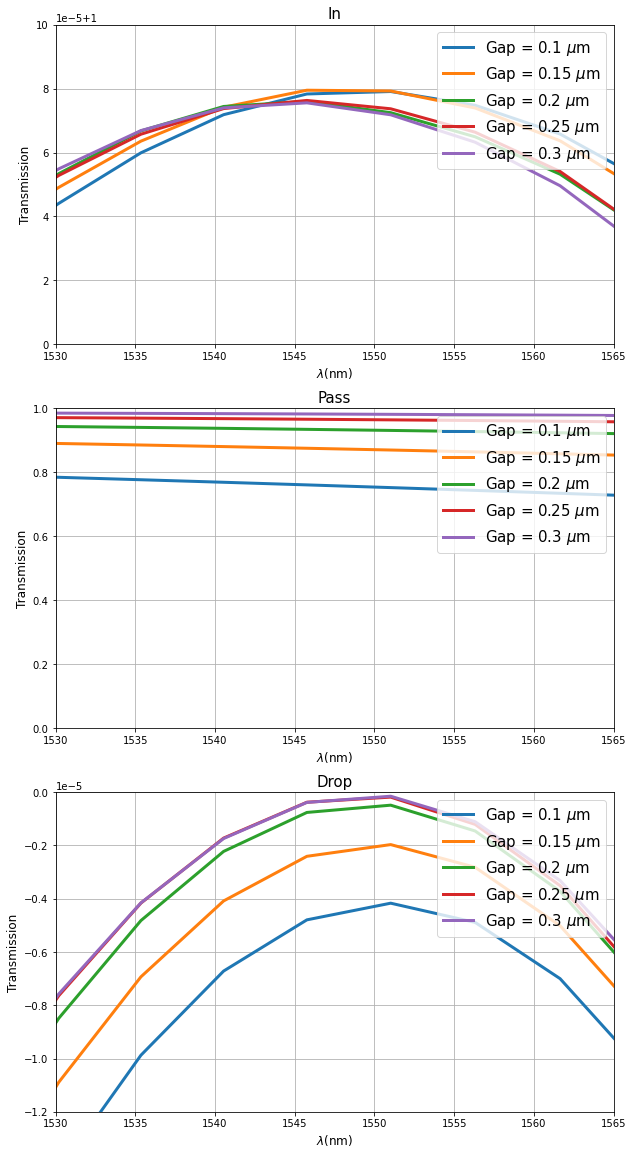

In [84]:
figure2,ax1 = plt.subplots(3, 1, figsize=(10,20))

Gap = np.linspace(0.1, 0.3, 5)
Pass = fdtd.getsweepresult('Gap sweep', 'Pass')
Drop = fdtd.getsweepresult('Gap sweep', 'Drop')
In = fdtd.getsweepresult('Gap sweep', 'In')
wavelenght = Pass['lambda']
Pass = np.transpose(Pass['T'])
Drop = np.transpose(Drop['T'])
In = np.transpose(In['T'])

for i in range(5):
    ax1[0].plot(wavelenght*1e9, In[i, :], label = 'Gap = ' + str(Gap[i]) + r' $\mu$m', linewidth = 3)

ax1[0].set_xlim(1530, 1565)
ax1[0].set_ylim(1, 1.0001)
ax1[0].set_ylabel("Transmission", fontsize = '12')
ax1[0].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
ax1[0].set_title('In', size = 15)
ax1[0].legend(loc = 'upper right', prop = {'size': 15})
ax1[0].grid(True)

for i in range(5):
    ax1[1].plot(wavelenght*1e9, Pass[i, :], label = 'Gap = ' + str(Gap[i]) + r' $\mu$m', linewidth = 3)

ax1[1].set_xlim(1530, 1565)
ax1[1].set_ylim(0, 1)
ax1[1].set_ylabel("Transmission", fontsize = '12')
ax1[1].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
ax1[1].set_title('Pass', size = 15)
ax1[1].legend(loc = 'upper right', prop = {'size': 15})
ax1[1].grid(True)

for i in range(5):
    ax1[2].plot(wavelenght*1e9, Drop[i, :], label = 'Gap = ' + str(Gap[i]) + r' $\mu$m', linewidth = 3)

ax1[2].set_xlim(1530, 1565)
ax1[2].set_ylim(-1.2e-5, 0)
ax1[2].set_ylabel("Transmission", fontsize = '12')
ax1[2].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
ax1[2].set_title('Drop', size = 15)
ax1[2].legend(loc = 'upper right', prop = {'size': 15})
ax1[2].grid(True)

figure.suptitle('Gap Sweep', size = '20')

plt.savefig("Imagens/Gap Sweep")

<font size = 6>Interconnect

In [119]:
inter = lumapi.INTERCONNECT(filename = 'Interconnect/Anel FSR = 25.6 FWHM = 0.8.icp')

In [120]:
inter.switchtodesign()
inter.run()

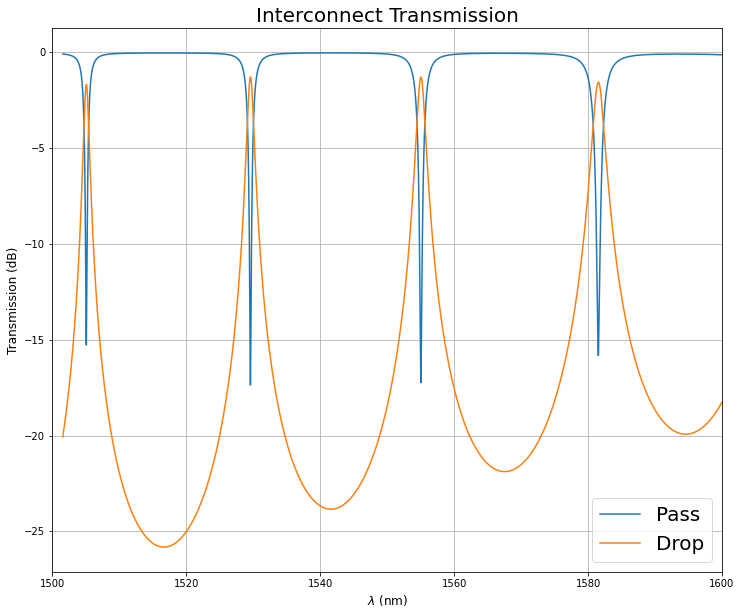

In [123]:
Ipass = inter.getresult('ONA_1','input 1/mode 1/gain')
Idrop = inter.getresult('ONA_1','input 2/mode 1/gain')

plt.figure(figsize = (12,10))
plt.plot(Ipass['wavelength']*1e9, Ipass['mode 1 gain (dB)'], label = 'Pass')
plt.plot(Idrop['wavelength']*1e9, Idrop['mode 1 gain (dB)'], label = 'Drop')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Interconnect Transmission', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Interconnect Transmission')

<font size = 6>Simulations

<font size = 4> Ring Resonator

In [34]:
sim1 = lumapi.INTERCONNECT(filename = 'Simulacoes/Ring.icp', hide = True)

sim1.switchtodesign()
sim1.run()

Pass = sim1.getresult('ONA_1','input 1/mode 1/gain')
Drop = sim1.getresult('ONA_1','input 2/mode 1/gain')

sim1.close()

In [36]:
ref1 = lumapi.INTERCONNECT(filename = 'Simulacoes/Ref1.icp', hide = True)

ref1.switchtodesign()
ref1.run()

Ref = ref1.getresult('ONA_1','input 1/mode 1/gain')

ref1.close()

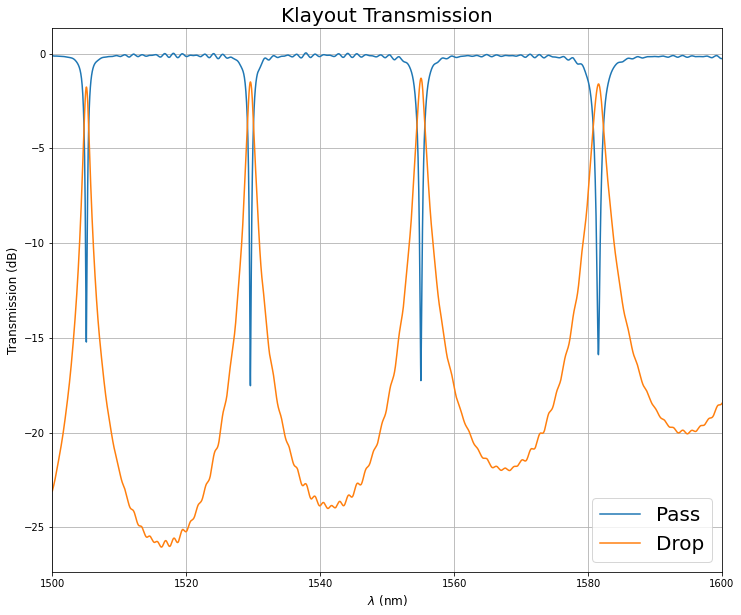

In [37]:
plt.figure(figsize = (12,10))
plt.plot(Pass['wavelength']*1e9, (Pass['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'Pass')
plt.plot(Drop['wavelength']*1e9, (Drop['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'Drop')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Klayout Transmission', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Klayout Transmission.png')

<font size = 4> L+5

In [46]:
sim2 = lumapi.INTERCONNECT(filename = 'Simulacoes/L+5 ring', hide = True)

sim2.switchtodesign()
sim2.run()

L5 = sim2.getresult('ONA_1','input 1/mode 1/gain')

sim2.close()

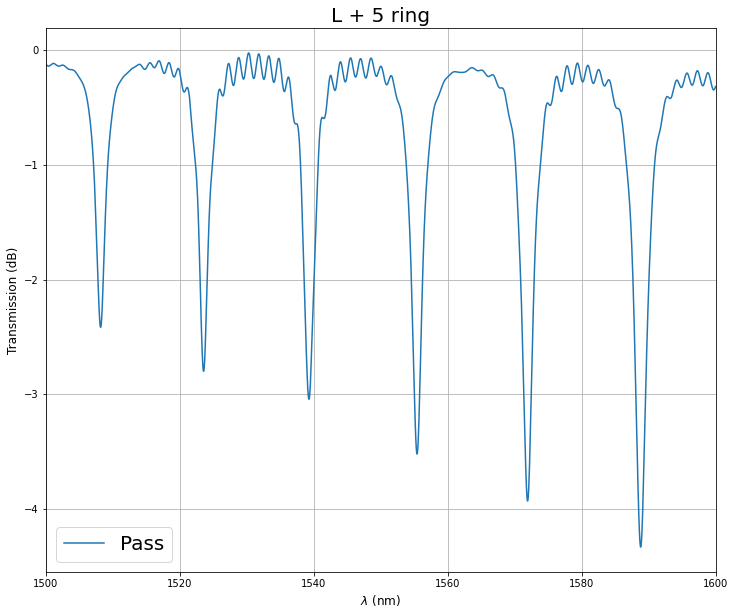

In [47]:
plt.figure(figsize = (12,10))
plt.plot(L5['wavelength']*1e9, (L5['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'Pass')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('L + 5 ring', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/L + 5 Ring.png')

<font size = 4>L+10

In [48]:
sim3 = lumapi.INTERCONNECT(filename = 'Simulacoes/L+10 ring', hide = True)

sim3.switchtodesign()
sim3.run()

L10 = sim3.getresult('ONA_1','input 1/mode 1/gain')

sim3.close()

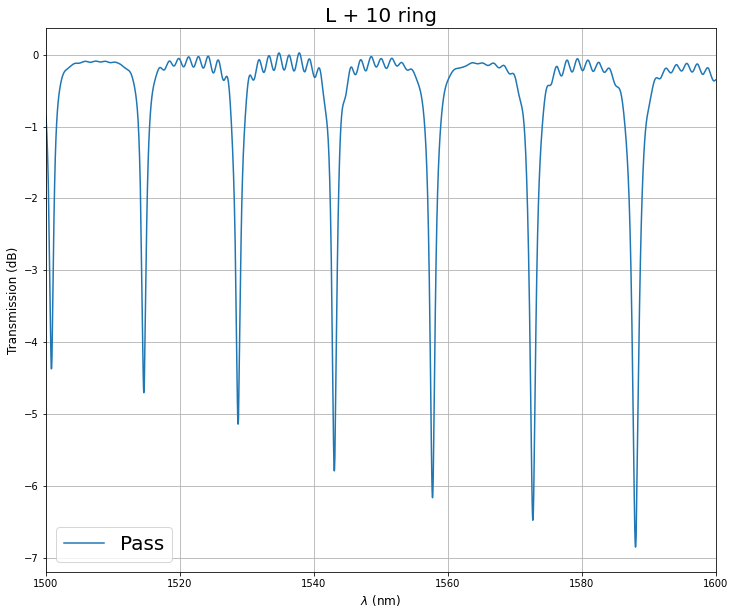

In [49]:
plt.figure(figsize = (12,10))
plt.plot(L10['wavelength']*1e9, (L10['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'Pass')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('L + 10 ring', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/L + 10 Ring.png')

<font size = 4> L+20

In [50]:
sim4 = lumapi.INTERCONNECT(filename = 'Simulacoes/L+20 ring', hide = True)

sim4.switchtodesign()
sim4.run()

L20 = sim4.getresult('ONA_1','input 1/mode 1/gain')

sim4.close()

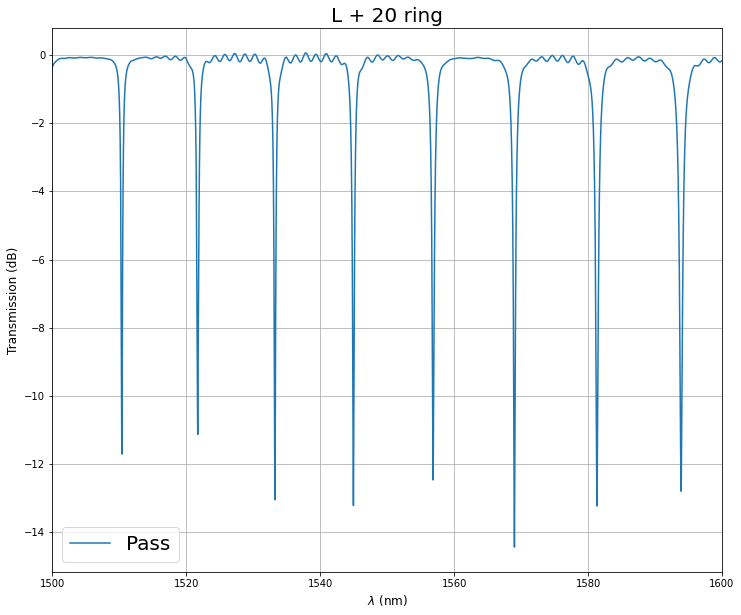

In [57]:
plt.figure(figsize = (12,10))
plt.plot(L20['wavelength']*1e9, (L20['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'Pass')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('L + 20 ring', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/L + 20 Ring.png')

<font size = 4>Length comparison

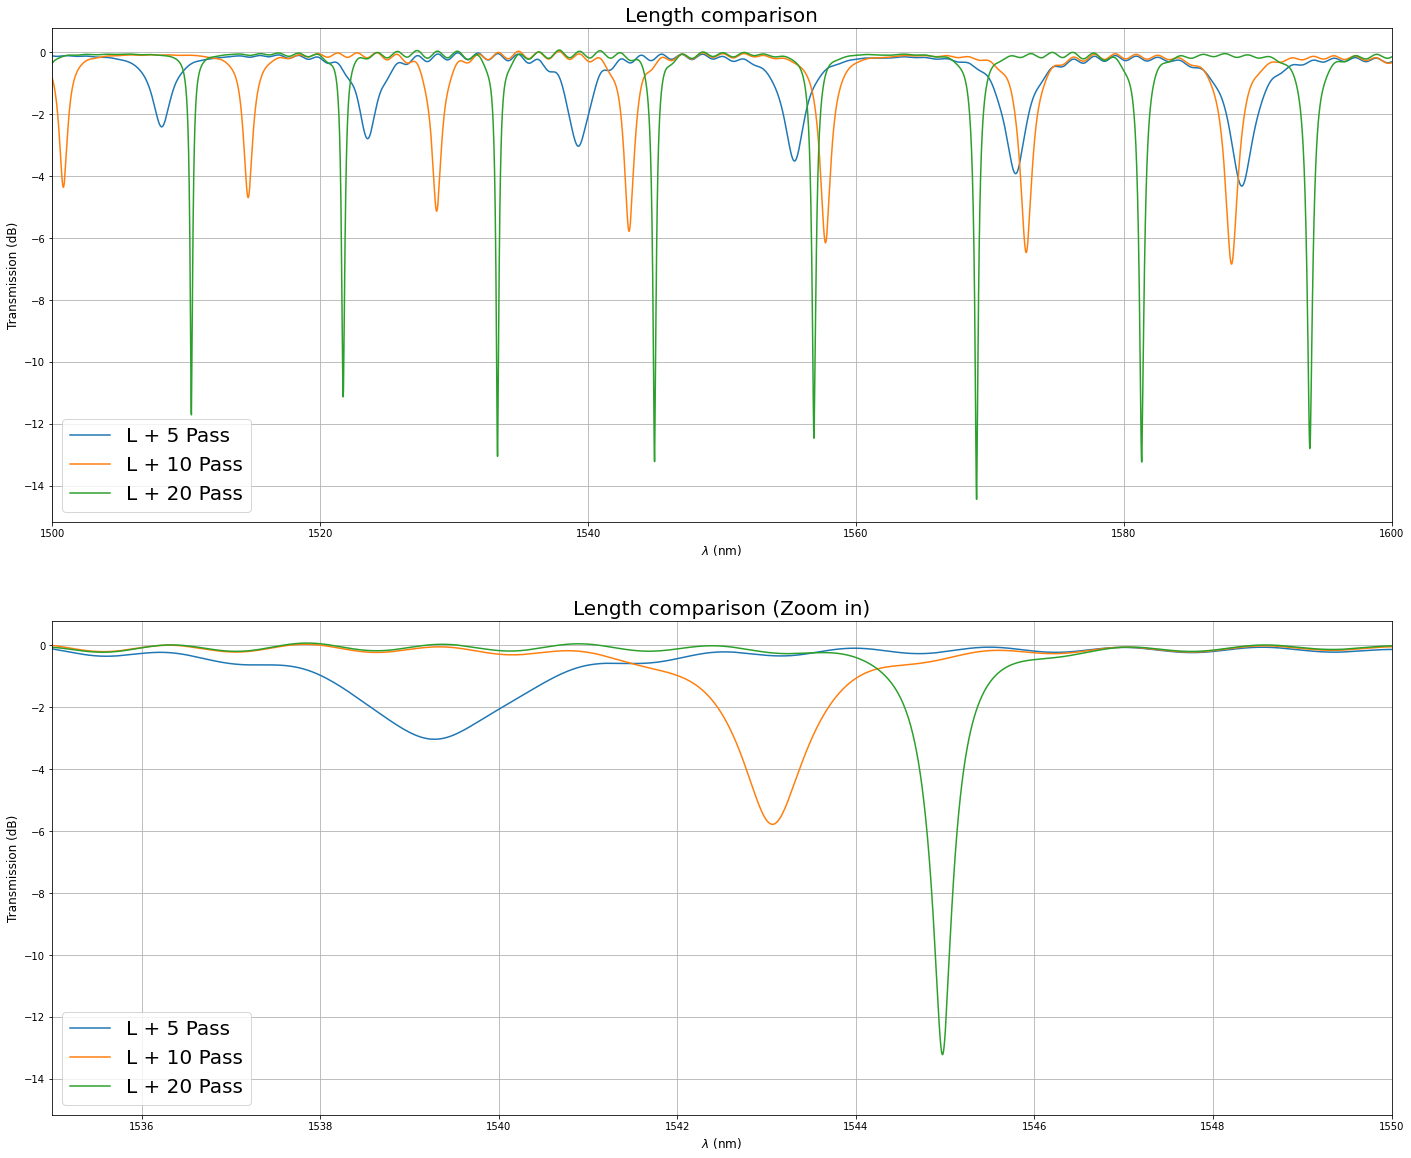

In [81]:
figure3, ax2 = plt.subplots(2, 1, figsize = (24,20))

ax2[0].plot(L5['wavelength']*1e9, (L5['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'L + 5 Pass')
ax2[0].plot(L10['wavelength']*1e9, (L10['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'L + 10 Pass')
ax2[0].plot(L20['wavelength']*1e9, (L20['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'L + 20 Pass')
ax2[0].set_xlim(1500, 1600)
ax2[0].set_xlabel(r'$\lambda$ (nm)', fontsize = 12)
ax2[0].set_ylabel('Transmission (dB)', fontsize = 12)
ax2[0].legend(fontsize = 20)
ax2[0].set_title('Length comparison', fontsize = 20)
ax2[0].grid(True)

ax2[1].plot(L5['wavelength']*1e9, (L5['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'L + 5 Pass')
ax2[1].plot(L10['wavelength']*1e9, (L10['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'L + 10 Pass')
ax2[1].plot(L20['wavelength']*1e9, (L20['TE gain (dB)'] - Ref['TE gain (dB)']), label = 'L + 20 Pass')
ax2[1].set_xlim(1535, 1550)
ax2[1].set_xlabel(r'$\lambda$ (nm)', fontsize = 12)
ax2[1].set_ylabel('Transmission (dB)', fontsize = 12)
ax2[1].legend(loc = 'lower left', fontsize = 20)
ax2[1].set_title('Length comparison (Zoom in)', fontsize = 20)
ax2[1].grid(True)

plt.savefig('Imagens/Length comparison.png')

<font size = 4>Pass x 4

In [52]:
sim5 = lumapi.INTERCONNECT(filename = 'Simulacoes/Passx4.icp', hide = True)

sim5.switchtodesign()
sim5.run()

Passx4 = sim5.getresult('ONA_1','input 1/mode 1/gain')

sim5.close()

In [53]:
ref2 = lumapi.INTERCONNECT(filename = 'Simulacoes/Ref2.icp', hide = True)

ref2.switchtodesign()
ref2.run()

Ref2 = ref2.getresult('ONA_1','input 1/mode 1/gain')

ref2.close()

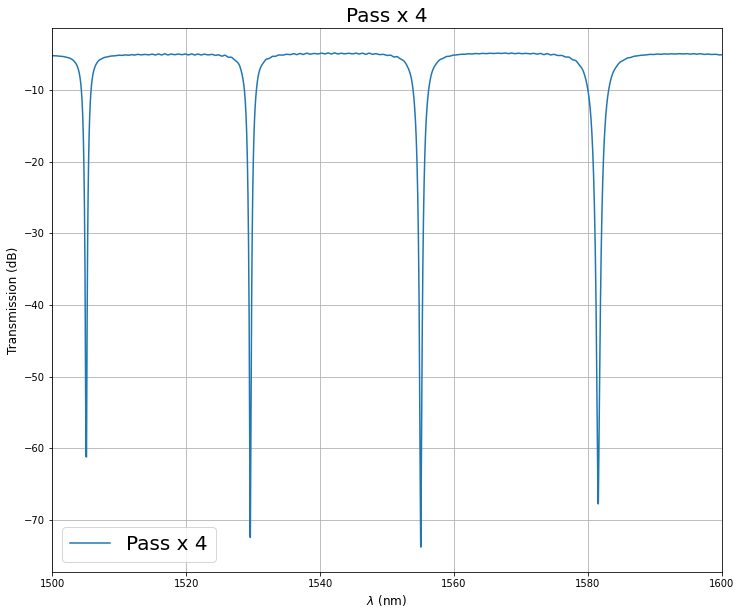

In [56]:
plt.figure(figsize = (12,10))
plt.plot(Passx4['wavelength']*1e9, (Passx4['TE gain (dB)'] - Ref2['TE gain (dB)']), label = 'Pass x 4')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Pass x 4', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Pass x 4.png')

<font size = 4>Pass x 3

In [55]:
sim6 = lumapi.INTERCONNECT(filename = 'Simulacoes/Passx3.icp', hide = True)

sim6.switchtodesign()
sim6.run()

Passx3 = sim6.getresult('ONA_1','input 1/mode 1/gain')

sim6.close()

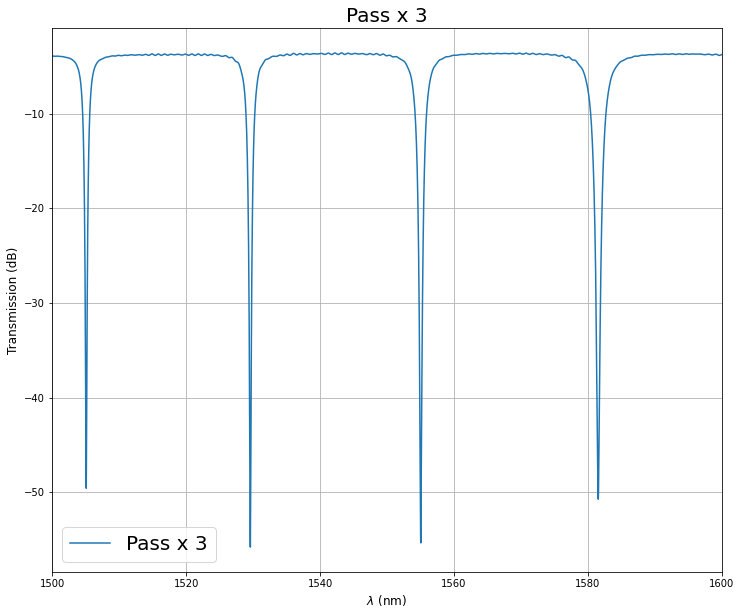

In [58]:
plt.figure(figsize = (12,10))
plt.plot(Passx3['wavelength']*1e9, (Passx3['TE gain (dB)'] - Ref2['TE gain (dB)']), label = 'Pass x 3')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Pass x 3', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Pass x 3.png')

<font size = 4>Pass x 2

In [59]:
sim7 = lumapi.INTERCONNECT(filename = 'Simulacoes/Passx2.icp', hide = True)

sim7.switchtodesign()
sim7.run()

Passx2 = sim7.getresult('ONA_1','input 1/mode 1/gain')

sim7.close()

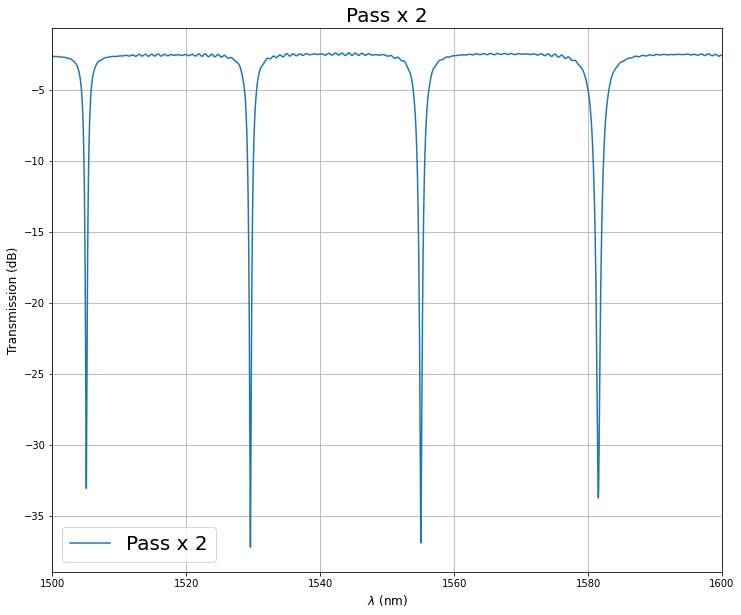

In [60]:
plt.figure(figsize = (12,10))
plt.plot(Passx2['wavelength']*1e9, (Passx2['TE gain (dB)'] - Ref2['TE gain (dB)']), label = 'Pass x 2')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Pass x 2', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Pass x 2.png')

<font size = 4>Pass number comparison

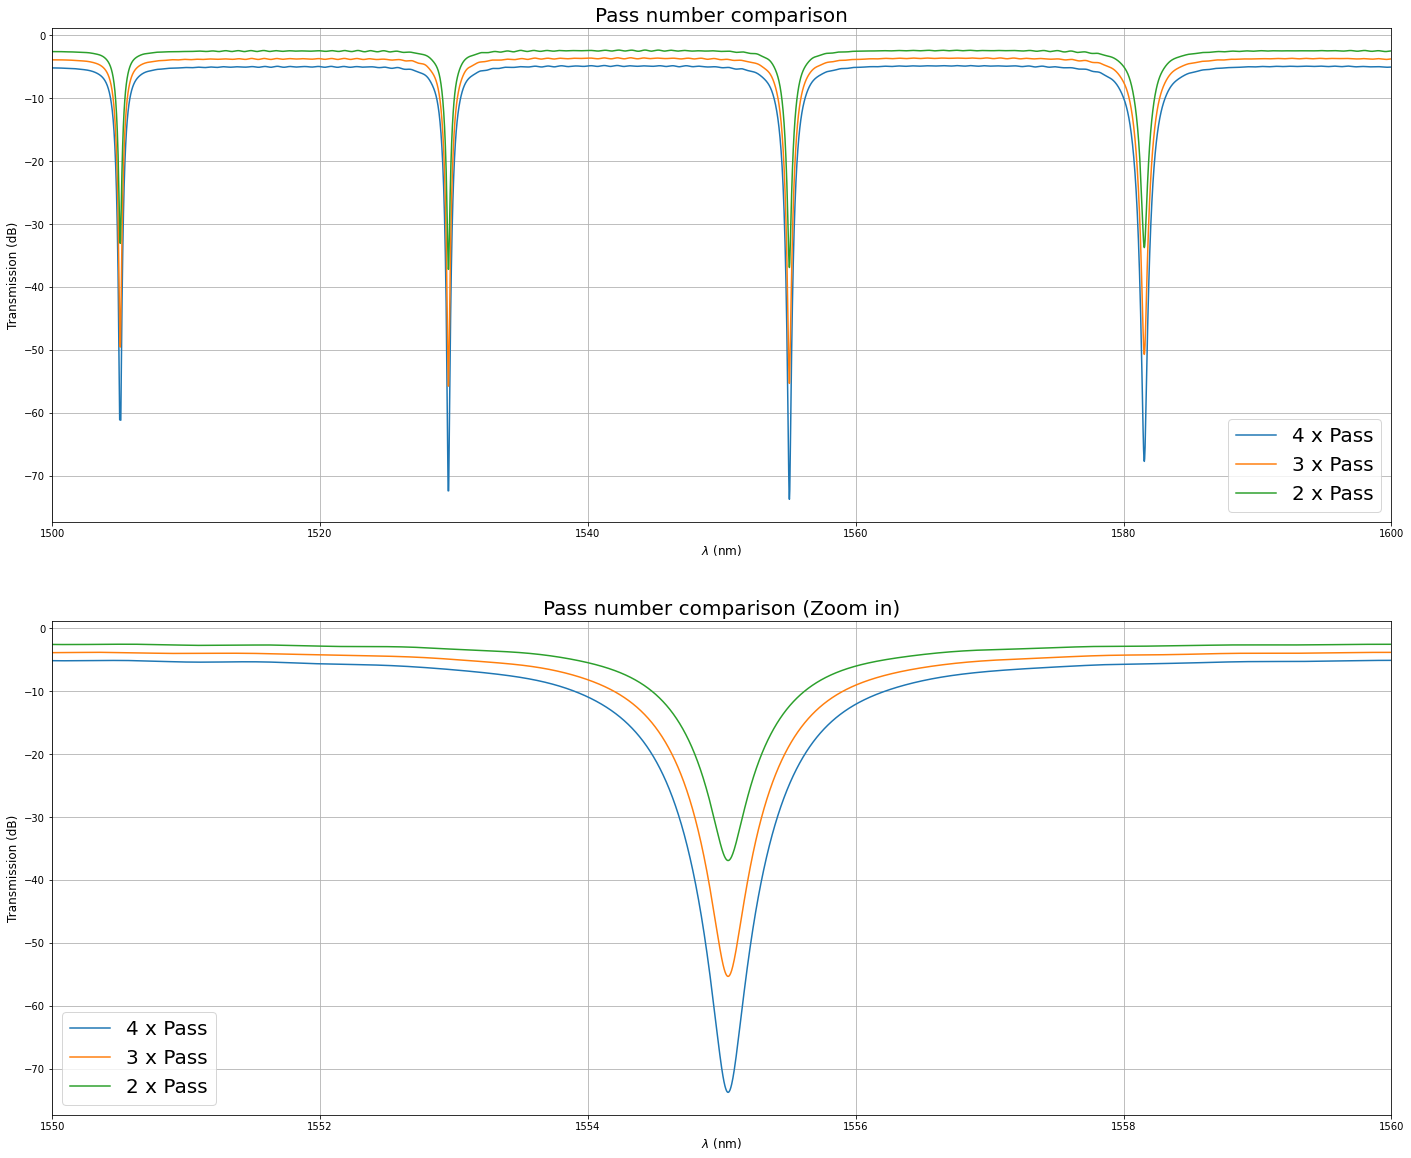

In [82]:
figure4, ax3 = plt.subplots(2, 1, figsize = (24,20))

ax3[0].plot(Passx4['wavelength']*1e9, (Passx4['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '4 x Pass')
ax3[0].plot(Passx3['wavelength']*1e9, (Passx3['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '3 x Pass')
ax3[0].plot(Passx2['wavelength']*1e9, (Passx2['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '2 x Pass')
ax3[0].set_xlim(1500, 1600)
ax3[0].set_xlabel(r'$\lambda$ (nm)', fontsize = 12)
ax3[0].set_ylabel('Transmission (dB)', fontsize = 12)
ax3[0].legend(fontsize = 20)
ax3[0].set_title('Pass number comparison', fontsize = 20)
ax3[0].grid(True)

ax3[1].plot(Passx4['wavelength']*1e9, (Passx4['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '4 x Pass')
ax3[1].plot(Passx3['wavelength']*1e9, (Passx3['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '3 x Pass')
ax3[1].plot(Passx2['wavelength']*1e9, (Passx2['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '2 x Pass')
ax3[1].set_xlim(1550, 1560)
ax3[1].set_xlabel(r'$\lambda$ (nm)', fontsize = 12)
ax3[1].set_ylabel('Transmission (dB)', fontsize = 12)
ax3[1].legend(fontsize = 20)
ax3[1].set_title('Pass number comparison (Zoom in)', fontsize = 20)
ax3[1].grid(True)

plt.savefig('Imagens/Pass number comparison.png')

<font size = 4>Drop x 4

In [61]:
sim8 = lumapi.INTERCONNECT(filename = 'Simulacoes/Dropx4.icp', hide = True)

sim8.switchtodesign()
sim8.run()

Dropx4 = sim8.getresult('ONA_1','input 1/mode 1/gain')

sim8.close()

In [62]:
ref3 = lumapi.INTERCONNECT(filename = 'Simulacoes/Ref3.icp', hide = True)

ref3.switchtodesign()
ref3.run()

Ref3 = ref3.getresult('ONA_1','input 1/mode 1/gain')

ref3.close()

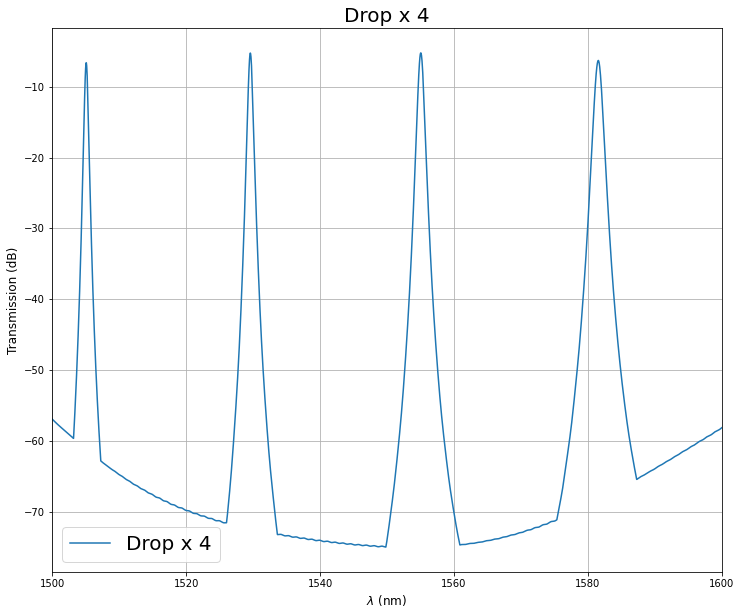

In [63]:
plt.figure(figsize = (12,10))
plt.plot(Dropx4['wavelength']*1e9, (Dropx4['TE gain (dB)'] - Ref3['TE gain (dB)']), label = 'Drop x 4')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Drop x 4', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Drop x 4.png')

<font size = 4>Drop x 3

In [64]:
sim9 = lumapi.INTERCONNECT(filename = 'Simulacoes/Dropx3.icp', hide = True)

sim9.switchtodesign()
sim9.run()

Dropx3 = sim9.getresult('ONA_1','input 1/mode 1/gain')

sim9.close()

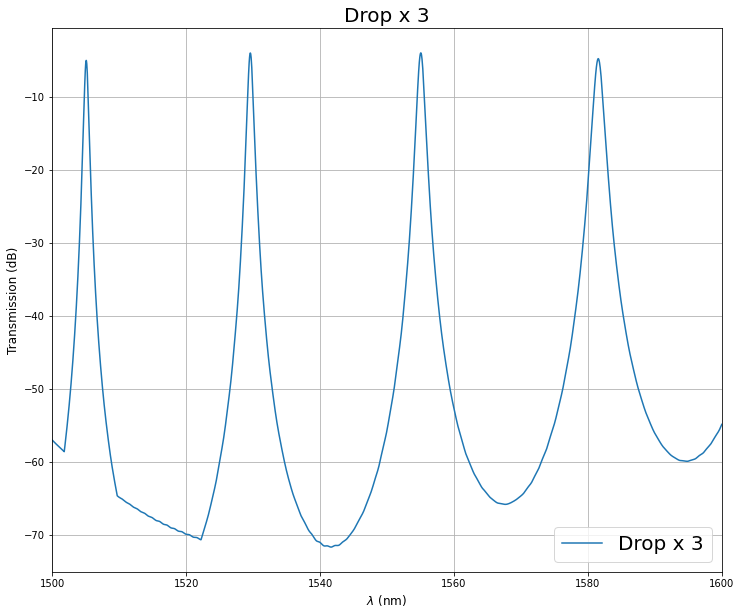

In [65]:
plt.figure(figsize = (12,10))
plt.plot(Dropx3['wavelength']*1e9, (Dropx3['TE gain (dB)'] - Ref3['TE gain (dB)']), label = 'Drop x 3')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Drop x 3', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Drop x 3.png')

<font size = 4>Drop x 2

In [66]:
sim10 = lumapi.INTERCONNECT(filename = 'Simulacoes/Dropx2.icp', hide = True)

sim10.switchtodesign()
sim10.run()

Dropx2 = sim10.getresult('ONA_1','input 1/mode 1/gain')

sim10.close()

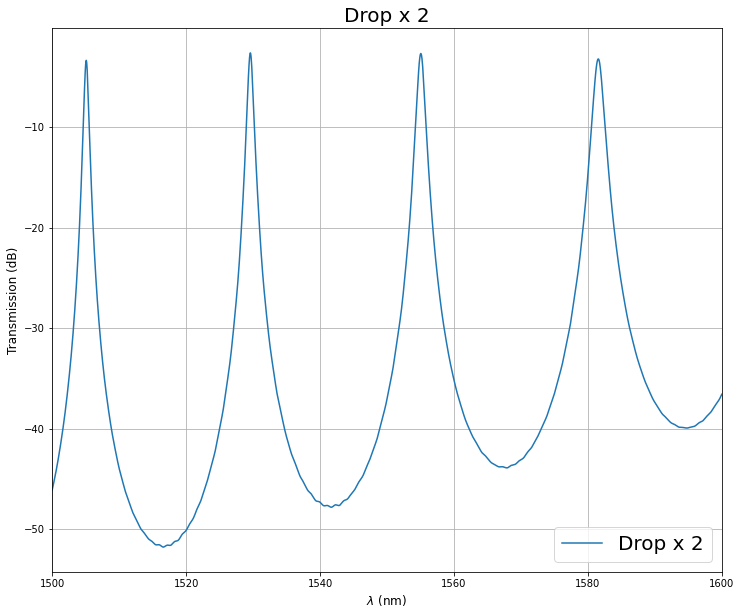

In [67]:
plt.figure(figsize = (12,10))
plt.plot(Dropx2['wavelength']*1e9, (Dropx2['TE gain (dB)'] - Ref3['TE gain (dB)']), label = 'Drop x 2')
plt.xlim(1500, 1600)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(fontsize = 20)
plt.title('Drop x 2', fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Drop x 2.png')

<font size = 4>Drop number comparison

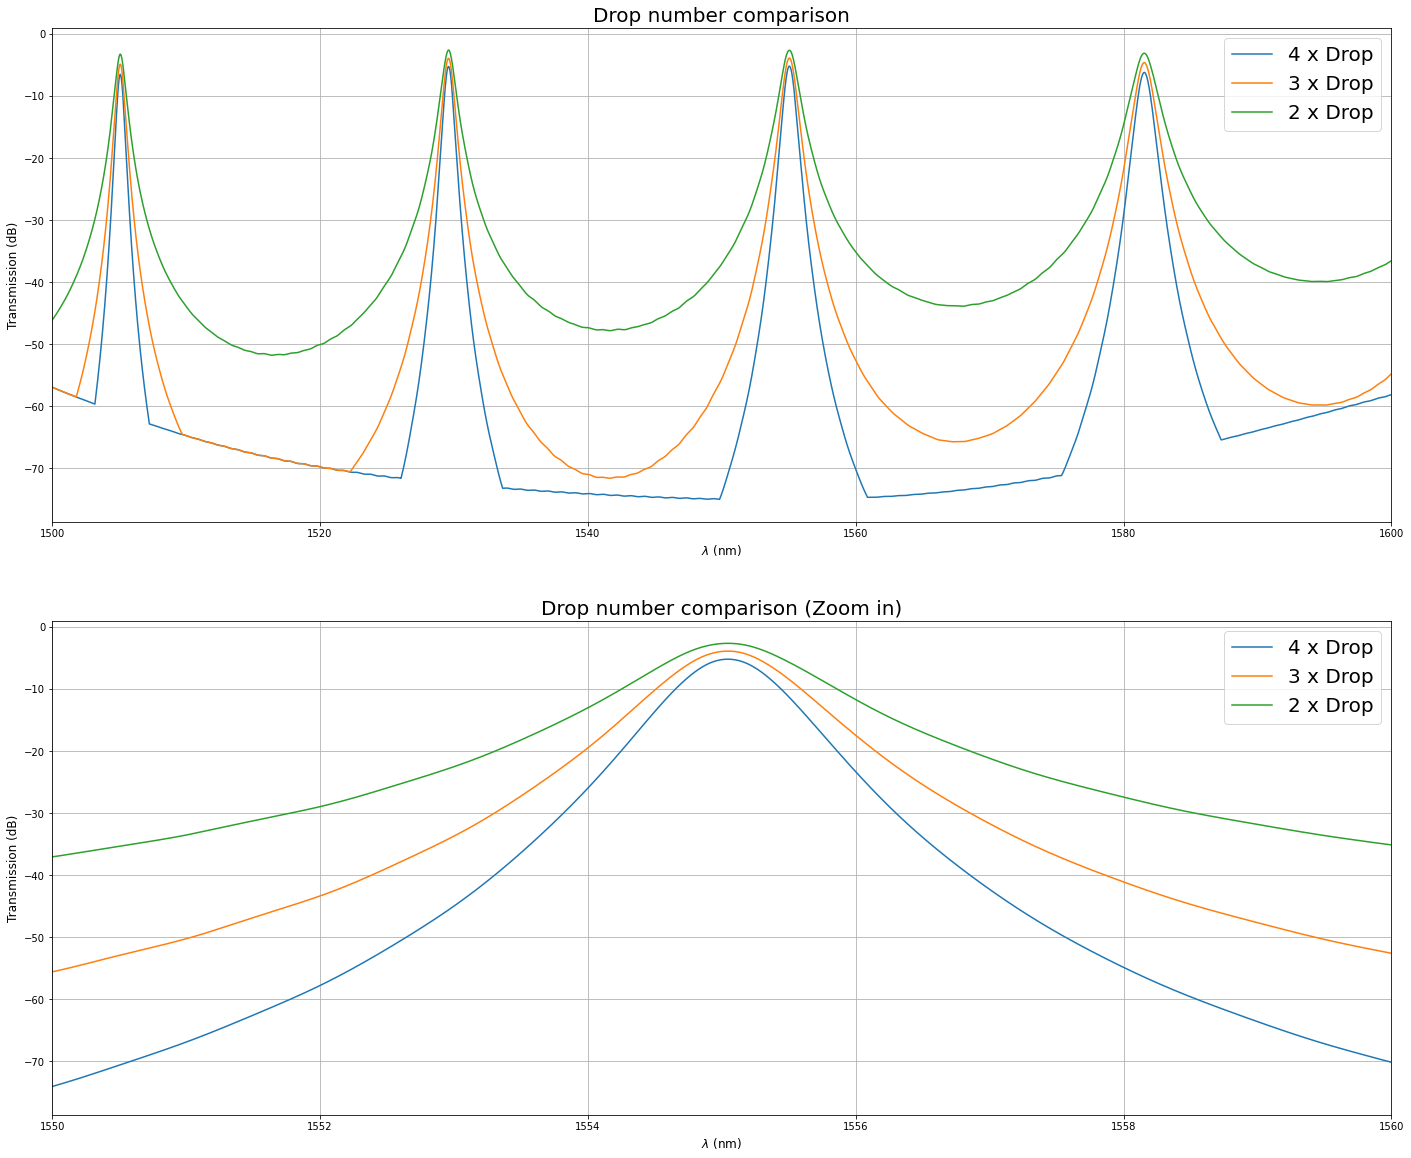

In [126]:
figure5, ax4 = plt.subplots(2, 1, figsize = (24,20))

ax4[0].plot(Dropx4['wavelength']*1e9, (Dropx4['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '4 x Drop')
ax4[0].plot(Dropx3['wavelength']*1e9, (Dropx3['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '3 x Drop')
ax4[0].plot(Dropx2['wavelength']*1e9, (Dropx2['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '2 x Drop')
ax4[0].set_xlim(1500, 1600)
ax4[0].set_xlabel(r'$\lambda$ (nm)', fontsize = 12)
ax4[0].set_ylabel('Transmission (dB)', fontsize = 12)
ax4[0].legend(fontsize = 20)
ax4[0].set_title('Drop number comparison', fontsize = 20)
ax4[0].grid(True)

ax4[1].plot(Dropx4['wavelength']*1e9, (Dropx4['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '4 x Drop')
ax4[1].plot(Dropx3['wavelength']*1e9, (Dropx3['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '3 x Drop')
ax4[1].plot(Dropx2['wavelength']*1e9, (Dropx2['TE gain (dB)'] - Ref2['TE gain (dB)']), label = '2 x Drop')
ax4[1].set_xlim(1550, 1560)
ax4[1].set_xlabel(r'$\lambda$ (nm)', fontsize = 12)
ax4[1].set_ylabel('Transmission (dB)', fontsize = 12)
ax4[1].legend(fontsize = 20)
ax4[1].set_title('Drop number comparison (Zoom in)', fontsize = 20)
ax4[1].grid(True)

plt.savefig('Imagens/Drop number comparison.png')